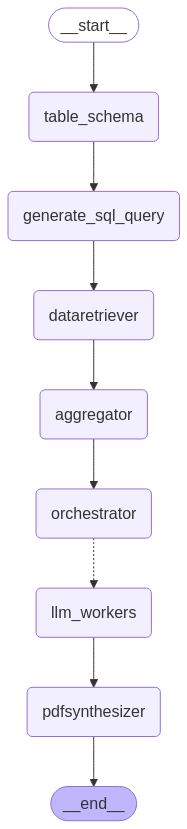

In [20]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from projectai.state.state import State
from projectai.nodes.schema import get_schema_info
from projectai.nodes.sqlquerygenerator import generate_sql_from_query
from projectai.nodes.dataretriever import query_database
from projectai.nodes.orchestrator import orchestrator,aggregator
from projectai.tools.reddit import get_reddit_text
from projectai.nodes.llm_workers import llm_workers,assign_workers
from projectai.nodes.pdfsynthesizer import pdfsynthesizer
from IPython.display import Markdown
import asyncio 

# Initialize the parallel builder
parallel_builder = StateGraph(State)

# Add nodes with their corresponding functions
parallel_builder.add_node("table_schema", get_schema_info)
parallel_builder.add_node("generate_sql_query", generate_sql_from_query)
parallel_builder.add_node("dataretriever", query_database)
parallel_builder.add_node("aggregator", aggregator)
parallel_builder.add_node("orchestrator", orchestrator)
# parallel_builder.add_node("reddit_search", get_reddit_text)
parallel_builder.add_node("llm_workers", llm_workers)
parallel_builder.add_node("pdfsynthesizer", pdfsynthesizer)

# Add edges to connect nodes
parallel_builder.add_edge(START, "table_schema")
# parallel_builder.add_edge(START, "reddit_search")
parallel_builder.add_edge("table_schema", "generate_sql_query")
parallel_builder.add_edge("generate_sql_query", "dataretriever")
parallel_builder.add_edge("dataretriever", "aggregator")
# parallel_builder.add_edge("reddit_search", "aggregator")
parallel_builder.add_edge("aggregator", "orchestrator")
parallel_builder.add_conditional_edges("orchestrator", assign_workers, ["llm_workers"])
parallel_builder.add_edge("llm_workers", "pdfsynthesizer")
parallel_builder.add_edge("pdfsynthesizer", END)

# Compile the workflow
graph_workflow = parallel_builder.compile()

display(Image(graph_workflow.get_graph().draw_mermaid_png()))

In [13]:
graph_builder = GraphBuilder()

In [18]:
parallel_workflow=graph_builder.graph()
print(parallel_workflow)

<coroutine object GraphBuilder.graph at 0x7f13911f4d60>


In [11]:
async def main():
    await graph_builder.graph()

In [ ]:
parallel_workflow

In [1]:
import pandas as pd

In [35]:
file_path="/home/sridhar/AI_Spring_2025/1. students/s.sunke/automationproject/projectai/data/BLACK ENTERTAINMENT TV_SmartGridView_2024.xlsx"

In [36]:
df=pd.read_excel(file_path)

In [ ]:
df

In [38]:
df["Start Date"] = pd.to_datetime(df["Start Date"]).dt.strftime('%Y-%m-%d')
df["End Date"] = pd.to_datetime(df["End Date"]).dt.strftime('%Y-%m-%d')

# Convert Start Time and End Time to string (HH:MM:SS)
df["Start Time"] = pd.to_datetime(df["Start Time"], format='%I:%M%p').dt.strftime('%H:%M:%S')
df["End Time"] = pd.to_datetime(df["End Time"], format='%I:%M%p').dt.strftime('%H:%M:%S')


# Convert float columns (ratings, coverage, etc.)
float_columns = [
    "National Rating", "National Rating PW", "National Rating P4W", "National Rating P8W", 
    "National Rating YOY", "Coverage Rating", "Coverage Rating PW", "Coverage Rating P4W", 
    "Coverage Rating P8W", "Coverage Rating YOY", "Network Daypart Avg P52W", "National Share", 
    "National Share PW", "National Share P4W", "National Share P8W", "National Share YOY", 
    "Coverage Share", "Coverage Share PW", "Coverage Share P4W", "Coverage Share P8W", 
    "Coverage Share YOY", "Reach", "Reach P4W", "Reach YOY", "TSV", "TSV PW", "TSV P4W", 
    "TSV P8W", "TSV YOY", "Retention"
]
df[float_columns] = df[float_columns].apply(pd.to_numeric, errors="coerce")

# Convert int columns (AA, Reach, etc.)
int_columns = [
    "National AA (000s)", "National AA (000s) PW", "National AA (000s) P8W", "Coverage AA (000s)",
    "Coverage AA (000s) PW", "Coverage AA (000s) P8W", "Reach PW", "Reach P8W"
]
df[int_columns] = df[int_columns].apply(pd.to_numeric, errors="coerce").astype("Int64")

# Convert object columns (Feed Pattern Indicator, Premiere?, Movie Indicator, Special Indicator)
df["Feed Pattern Indicator"] = df["Feed Pattern Indicator"].astype("category")  # If categorical
df["Premiere?"] = df["Premiere?"].map({"Yes": True, "No": False})  # Convert Yes/No to boolean
df["Movie Indicator"] = df["Movie Indicator"].map({"Yes": True, "No": False})  # Convert Yes/No to boolean
df["Special Indicator"] = df["Special Indicator"].map({"Yes": True, "No": False})  # Convert Yes/No to boolean

# Handle NaN (replace with None for Supabase compatibility)
df = df.astype(object).where(pd.notnull(df), None)

In [ ]:
data

In [ ]:
df[8005:]

In [ ]:
df.isnull().sum()

In [14]:
df=df.astype(object).where(pd.notnull(df),None)

In [ ]:
df.isnull().sum()

In [ ]:
df

In [ ]:
df.dtypes